In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Loading the Data

In [2]:
#loading the training data
trainset = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
#loading the test data
testset = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')


# Examining the Data

In [3]:
#finding shape of dataset
print(trainset.shape)
print(testset.shape)
#trainset.head

(13636, 15)
(4546, 14)


In [4]:
#finding info about data features
trainset.info()
#testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


This helps us understand the datatype of the columns(features) as well as the count of non-null values present

In [5]:
#no. of unique features
trainset.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

In [6]:
#statistical description of feature data
trainset.describe(include='all')

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
count,13636.000000,13636.000000,13636.000000,13636,13636,13636,13636,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000,13634
unique,NaN,NaN,NaN,100,13636,10783,10620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13370
top,NaN,NaN,NaN,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delicious!
freq,NaN,NaN,NaN,553,1,20,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
mean,121.085289,38.624377,21785.990833,NaN,NaN,NaN,NaN,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897,NaN
std,116.995633,29.672351,23883.189918,NaN,NaN,NaN,NaN,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908,NaN
min,0.000000,1.000000,386.000000,NaN,NaN,NaN,NaN,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,45.000000,12.000000,6504.000000,NaN,NaN,NaN,NaN,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN
50%,91.000000,33.000000,14600.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN
75%,148.000000,63.000000,33121.000000,NaN,NaN,NaN,NaN,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,NaN


This gives us stastical properties of each features. We can see that out data consists of outliers by checking the values of min and max and comparing them with 25% and 75% percentile values respectively. A class balance is also indicated by above statistics.

# Data Cleaning

In [7]:
#dropping unnecessary text columns from training and test set
columns_to_drop = ['CommentID','UserID','RecipeName','UserName','CreationTimestamp','ID','UserReputation']
trainset = trainset.drop(columns=columns_to_drop)
testset = testset.drop(columns=columns_to_drop)
trainset

,RecipeNumber,RecipeCode,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,71,12259,0,0,0,5,100,great recipe! I have made them just as written...
1,88,8202,0,0,1,5,100,This is an easy and quick recipe that is great...
2,3,2832,0,0,0,3,100,I think I was looking for something extra spec...
3,50,100276,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,12,19731,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...
13631,98,11767,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,6,21444,0,0,0,5,100,I made this pie for my family and they loved i...
13633,37,20170,0,0,0,5,100,Very tasty!
13634,63,24886,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


Most categorical columns were dropped intutively due to their seemigly negligible relevance to the target column, based on common human judgement.

In [8]:
#checking for missing values
trainset.isnull().sum()
#testset.isnull().sum()

RecipeNumber       0
RecipeCode         0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
Rating             0
BestScore          0
Recipe_Review      2
dtype: int64

In [9]:
#filling missing values with empty string
trainset['Recipe_Review']=trainset['Recipe_Review'].fillna('')
testset['Recipe_Review']=testset['Recipe_Review'].fillna('')

Missing values detected in the remaining categorical column were replaced with an empty string

In [10]:
# checking for duplicate rows
trainset.duplicated().value_counts()
#testset.duplicated().value_counts()

False    13482
True       154
Name: count, dtype: int64

In [11]:
#finding correlation between target column and other columns
colsofinterest = trainset.drop('Recipe_Review', axis=1)
colsofinterest.corr()['Rating']

RecipeNumber      -0.043127
RecipeCode        -0.020714
ReplyCount        -0.124860
ThumbsUpCount     -0.051752
ThumbsDownCount   -0.142273
Rating             1.000000
BestScore         -0.036719
Name: Rating, dtype: float64

correlation between numerical features and the target variable was calculated, and it seems that numerical features show very little linear correlation with the target variable

# Visualizing Features

Visualizing the correlation between numerical features

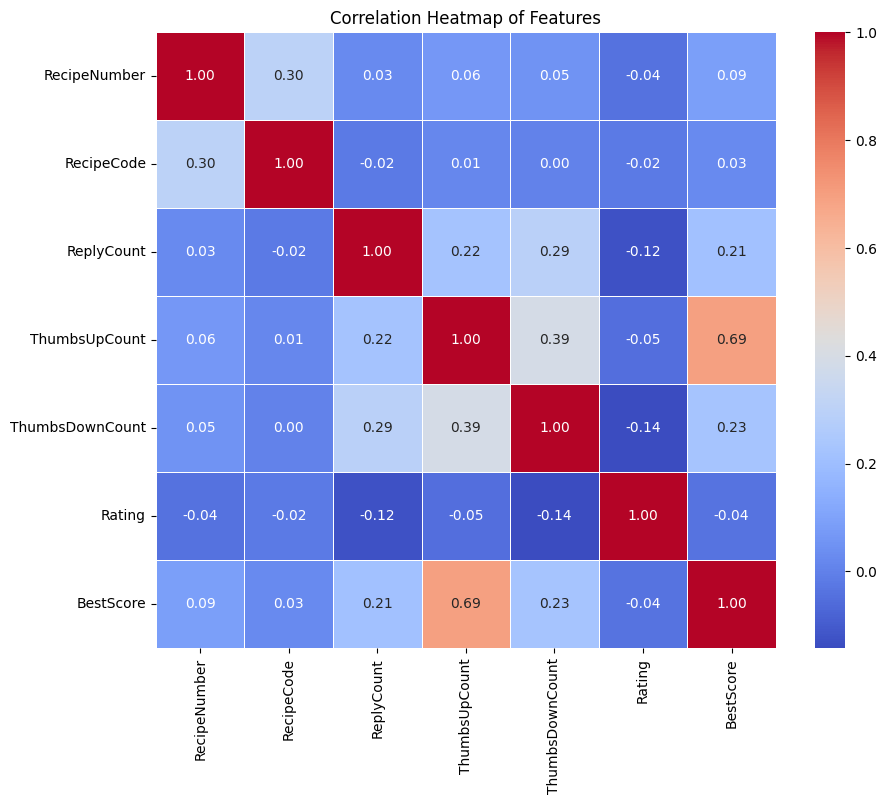

In [12]:
#heatmap of the correlation between numerical features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = colsofinterest.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

The above heatmap gives us a clear picture that the features have very low correlation with each other, including the target variable

Visualizing each feature individually to understand its distribution

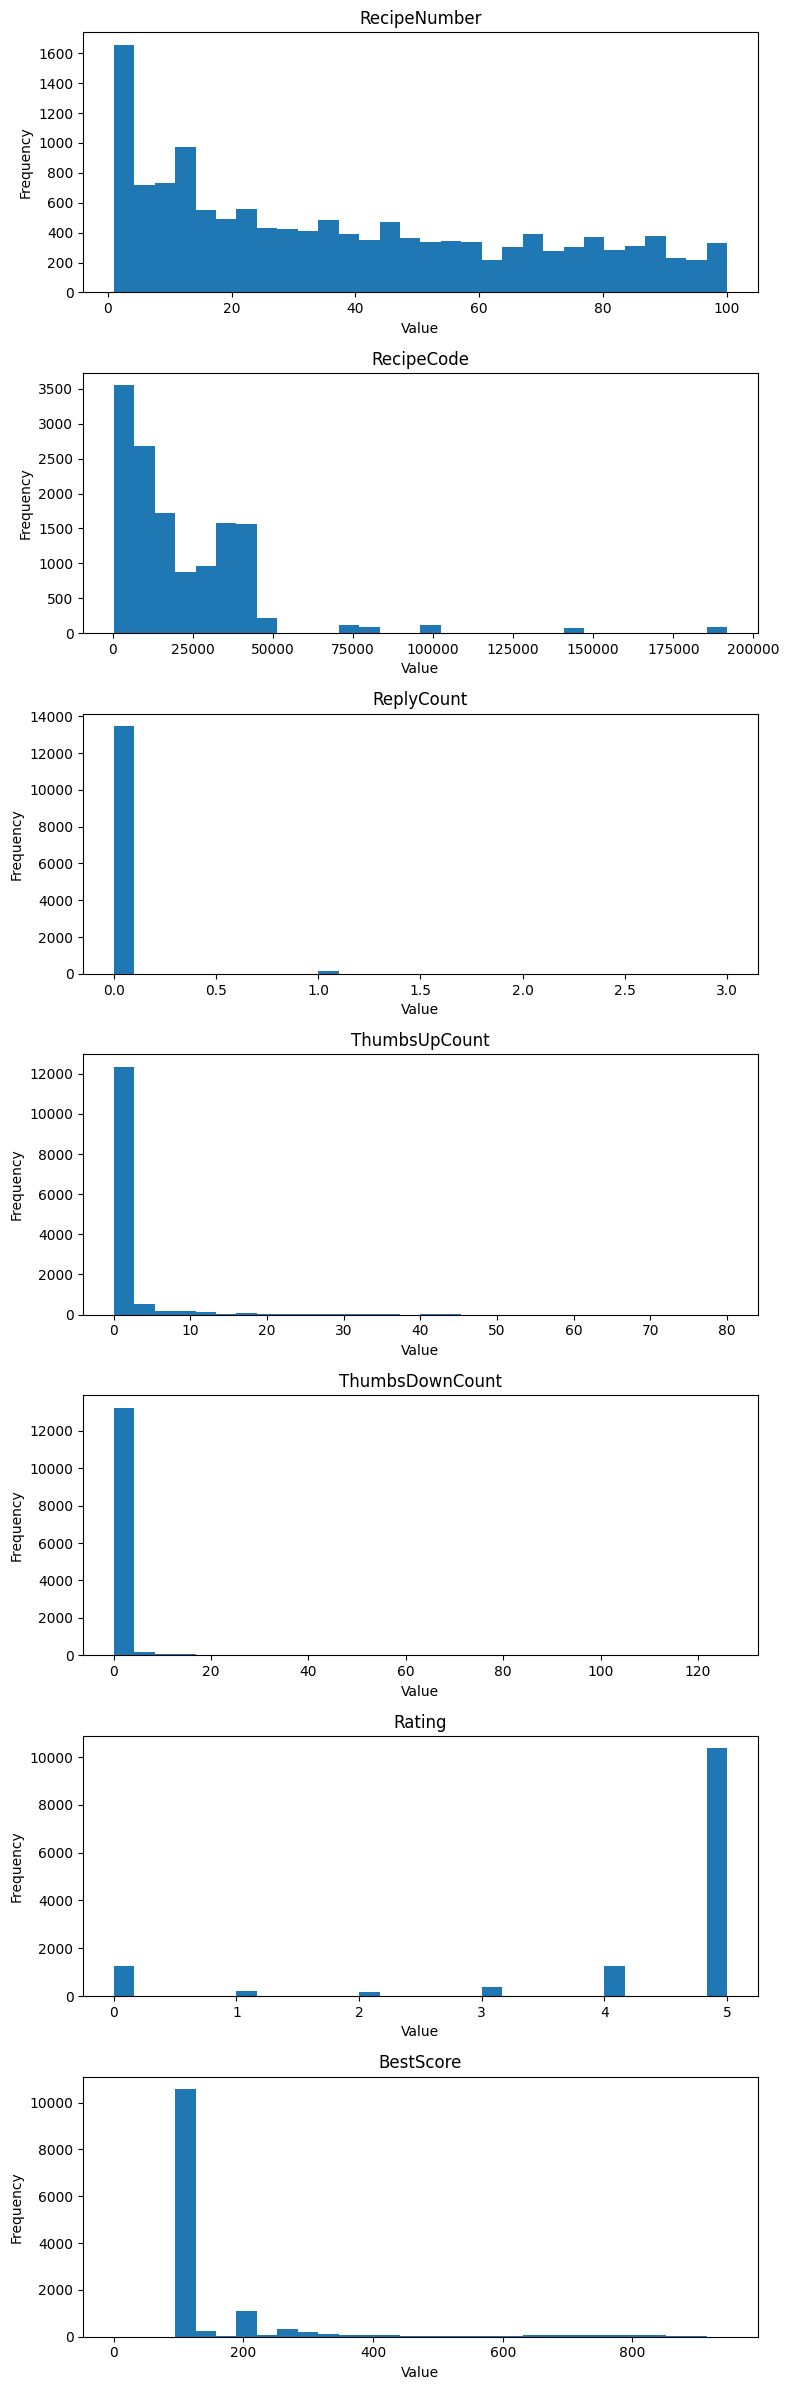

In [13]:
#plotting numerical features on a graph

features = trainset.shape[1] - 1  # excluding the recipe review column
fig, axes = plt.subplots(features, 1, figsize=(8, 24))

for i, col in enumerate(trainset.columns[:-1]):
    axes[i].hist(trainset[col], bins=30)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The above graphs confirms our assumption that there is a significant class imbalance prevalent in all columns(features), and also in the target variable.

# Data Preprocessing

Not using Polynomial features and PCA in my final notebook due to low accuracy

In [14]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler #, PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import PCA

# Defining numerical and categorical features
Numc = ['RecipeNumber', 'RecipeCode', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

# StandardScaler for numerical features
scaler = StandardScaler()

# TfidfVectorizer for categorical feature
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

#poly = PolynomialFeatures(degree=2)
#pca = PCA(n_components=5)

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', scaler, Numc), #('num', make_pipeline(scaler, poly, pca), Numc),
    ('text', tfidf, 'Recipe_Review')
])

preprocessor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['RecipeNumber', 'RecipeCode', 'ReplyCount',
                                  'ThumbsUpCount', 'ThumbsDownCount',
                                  'BestScore']),
                                ('text',
                                 TfidfVectorizer(max_features=5000,
                                                 stop_words='english'),
                                 'Recipe_Review')])

Numerical features are scaled using a standard scaler (mean=0, variance=1), and the only categorical feature is transformed by tf-idf vectorizer (multiplies the freq of a term in a doc to the inverse of
the no. of docs in which that term occurs)

# Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split
#separating features from label
X = trainset.drop(columns=['Rating'])
y = trainset['Rating']
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

20% of the data is kept aside to evaluate our model's performance

# Dummy Classifier

In [16]:
#dummy classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#using the 'most_frequent' strategy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# making predictions
y_pred = dummy_clf.predict(X_test)

# calculating accuracy
accuracy_score(y_test, y_pred)

0.7554985337243402

it ignores the input values and gives predictions based on the most frequently present class in our dataset

# Logistic Regression (Baseline Model)

In [17]:
# #logistic regression with cv
# from sklearn.linear_model import LogisticRegressionCV

# lr = make_pipeline(preprocessor, LogisticRegressionCV(cv=3,max_iter=4000, random_state = 42))
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(accuracy_score(y_test,y_pred))

Logistic Regression model after manually tuning hyperparameters

In [18]:
#logictic regression model
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(preprocessor, LogisticRegression(C=1, penalty='l2', max_iter=4000, random_state = 42))
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4727    0.1012    0.1667       257
           1     0.5833    0.1707    0.2642        41
           2     0.0000    0.0000    0.0000        34
           3     0.5000    0.0706    0.1237        85
           4     0.4444    0.0800    0.1356       250
           5     0.7839    0.9893    0.8747      2061

    accuracy                         0.7691      2728
   macro avg     0.4641    0.2353    0.2608      2728
weighted avg     0.7019    0.7691    0.6968      2728



# Random Forest Model

C = regularization rate, penalty = ridge

Tuning the hyperparameters to find the best params 

In [19]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# rfc = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

# param_dist = {
#     'randomforestclassifier__n_estimators': randint(100, 1000),  # Number of trees
#     'randomforestclassifier__max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of trees
#     'randomforestclassifier__min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
#     'randomforestclassifier__min_samples_leaf': randint(1, 5)  # Minimum number of samples required at each leaf node
# }

# random_search = RandomizedSearchCV(rfc, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)

# print(accuracy_score(y_test, y_pred))


Applying the best params found in the random forest model below

In [20]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc =  make_pipeline(preprocessor, RandomForestClassifier(n_estimators=158, max_depth=None, min_samples_leaf=1, min_samples_split=4,random_state = 42))
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6071    0.0661    0.1193       257
           1     0.6000    0.0732    0.1304        41
           2     0.0000    0.0000    0.0000        34
           3     0.6667    0.0706    0.1277        85
           4     0.7143    0.0200    0.0389       250
           5     0.7671    0.9971    0.8671      2061

    accuracy                         0.7647      2728
   macro avg     0.5592    0.2045    0.2139      2728
weighted avg     0.7320    0.7647    0.6758      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


min_samples_leaf specifies the minimum number of samples required to be in a leaf node of the decision tree. 

min_samples_split specifies the minimum number of samples required to split an internal node of the decision tree.

# Light Gradient Boosting Model

Tuning hyperparameters of LGBM model

In [21]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import GridSearchCV

# lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=42))

# # hyperparameters to tune
# param_grid = {
#     'lgbmclassifier__n_estimators': [250],
#     'lgbmclassifier__learning_rate': [0.01, 0.1],
#     'lgbmclassifier__max_depth': [9],
#     'lgbmclassifier__num_leaves': [20],
# }

# grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Using best params found from above to train lgbm model

In [22]:
#light gradient boosting machine with tuned hyperparameters
from lightgbm import LGBMClassifier

lgbm = make_pipeline(preprocessor, LGBMClassifier(learning_rate=0.1,max_depth=9, n_estimators=200, num_leaves=30, random_state=42))
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45520
[LightGBM] [Info] Number of data points in the train set: 10908, number of used features: 1195
[LightGBM] [Info] Start training from score -2.374608
[LightGBM] [Info] Start training from score -4.167353
[LightGBM] [Info] Start training from score -4.355609
[LightGBM] [Info] Start training from score -3.651805
[LightGBM] [Info] Start training from score -2.398537
[LightGBM] [Info] Start training from score -0.272037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

# KNN Classifier

Tuning the hyperparameters of KNN classifier

In [23]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from scipy.stats import randint

# knn = make_pipeline(preprocessor, KNeighborsClassifier())

# param_dist = {
#     'kneighborsclassifier__n_neighbors': randint(1, 20),
#     'kneighborsclassifier__weights': ['uniform', 'distance'],
#     'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
# }

# random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)
# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# print(accuracy_score(y_test, y_pred))

Applying the best params in the knn model below

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = make_pipeline(preprocessor, KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='distance'))
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


              precision    recall  f1-score   support

           0     0.5143    0.0700    0.1233       257
           1     0.3750    0.2195    0.2769        41
           2     0.0000    0.0000    0.0000        34
           3     0.2857    0.0235    0.0435        85
           4     0.5714    0.0160    0.0311       250
           5     0.7704    0.9913    0.8670      2061

    accuracy                         0.7610      2728
   macro avg     0.4195    0.2201    0.2236      2728
weighted avg     0.6974    0.7610    0.6750      2728



a ball tree is a data structure used to efficiently find the nearest neighbors of a query point in a high-dimensional space.

# XGBoost Classifier

Tuning the hyperparameters of XGBoost model

In [25]:
# import xgboost
# from xgboost.sklearn import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# xgb = make_pipeline(preprocessor, XGBClassifier(random_state=42))

# param_dist = {
#     'xgbclassifier__n_estimators': randint(100, 1500),
#     'xgbclassifier__max_depth': randint(3, 10),
#     'xgbclassifier__learning_rate': uniform(0.01, 0.3),
#     'xgbclassifier__gamma': uniform(0, 0.5),
#     'xgbclassifier__min_child_weight': randint(1, 5)
# }

# random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)
# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))

Using best params from above in the XGBoost model

In [26]:
# #xgboost classifier
import xgboost
from xgboost.sklearn import XGBClassifier

xgb = make_pipeline(preprocessor, XGBClassifier(gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=500, random_state=42))
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5526    0.1634    0.2523       257
           1     0.5417    0.3171    0.4000        41
           2     0.0667    0.0294    0.0408        34
           3     0.4800    0.1412    0.2182        85
           4     0.3585    0.0760    0.1254       250
           5     0.7980    0.9816    0.8803      2061

    accuracy                         0.7735      2728
   macro avg     0.4662    0.2848    0.3195      2728
weighted avg     0.7118    0.7735    0.7137      2728



Gamma specifies the minimum loss reduction required to make a further partition on a leaf node of the tree.

Minimum child weight specifies the minimum sum of instance weights needed in a child for the node to be split.

# Support Vector Classifier

Tuning the hyperparameters of Support Vector Classifier Model

In [27]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# svc = make_pipeline(preprocessor, SVC(random_state=42))

# param_grid = {
#     'svc__C': [0.1, 1, 10],              # Regularization parameter
#     'svc__kernel': ['linear', 'rbf'],    # Kernel type
#     'svc__gamma': ['scale', 'auto']      # Kernel coefficient
# }

# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))

Using best params found above in the SVC model

In [28]:
#svc model
from sklearn.svm import SVC

svc = make_pipeline(preprocessor, SVC(C=1, gamma='scale', kernel='linear', random_state=42))
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5429    0.0739    0.1301       257
           1     0.6400    0.3902    0.4848        41
           2     0.1429    0.0294    0.0488        34
           3     0.4000    0.0706    0.1200        85
           4     0.2727    0.0120    0.0230       250
           5     0.7787    0.9956    0.8739      2061

    accuracy                         0.7687      2728
   macro avg     0.4629    0.2620    0.2801      2728
weighted avg     0.6883    0.7687    0.6863      2728



# Decision Tree Classifier Model

Tuning the hyperparameters of Decision Tree Model

In [29]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))

# param_grid = {
#     'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
#     'decisiontreeclassifier__min_samples_split': [2, 5, 10],
#     'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
#     'decisiontreeclassifier__max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))

Using the best parameters found from above in the Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=5, random_state=42))
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.3077    0.0156    0.0296       257
           1     0.0000    0.0000    0.0000        41
           2     0.5000    0.0294    0.0556        34
           3     1.0000    0.0118    0.0233        85
           4     0.0714    0.0040    0.0076       250
           5     0.7583    0.9927    0.8598      2061

    accuracy                         0.7526      2728
   macro avg     0.4396    0.1756    0.1626      2728
weighted avg     0.6458    0.7526    0.6545      2728



/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are 

# Multi Layer Perceptron Model

Tuning the hyperparameters of multilayer perceptron model

In [31]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV

# mlp = make_pipeline(preprocessor, MLPClassifier(random_state=42))

# param_grid = {
#     'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'mlpclassifier__activation': ['relu', 'tanh'],
#     'mlpclassifier__solver': ['adam', 'sgd'],
#     'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
# }

# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# y_pred = best_model.predict(X_test)
# print(accuracy_score(y_test, y_pred))

Using the best params found above in the mlp model

In [32]:
#multi layer perceptron algorithm
from sklearn.neural_network import MLPClassifier

mlp = make_pipeline(preprocessor, MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(50,), solver='sgd', max_iter=1000, random_state=42))
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.3763    0.1362    0.2000       257
           1     0.3750    0.2927    0.3288        41
           2     0.0000    0.0000    0.0000        34
           3     0.5385    0.0824    0.1429        85
           4     0.3462    0.1440    0.2034       250
           5     0.8081    0.9748    0.8837      2061

    accuracy                         0.7694      2728
   macro avg     0.4073    0.2717    0.2931      2728
weighted avg     0.7001    0.7694    0.7145      2728



/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

hyperbolic tangent function (tanh) is used as the activation function for hidden layers, which maps input values to a range of -1 to 1 for hidden layers

stochastic gradient descent (SGD) is used as the optimization algorithm.

# Comparing and Evaluating the performance of different models

Finding the best model along with its accuracy

In [33]:
# Names of all the models used
model_names = ['lr', 'rfc', 'lgbm' , 'knn' , 'xgb', 'svc', 'dt', 'mlp']
models = [lr, rfc, lgbm , knn , xgb, svc, dt, mlp]
# Accuracy scores of all the models used
model_scores = [lr_acc, rfc_acc, lgbm_acc, knn_acc, xgb_acc, svc_acc, dt_acc, mlp_acc]

# Finding maximum score 
max_score = max(model_scores)
# Finding index of maximum score
max_score_index = model_scores.index(max_score)
# Finding model with the corresponding maximum score
bestmodel = models[max_score_index]
print(max_score)

0.7738269794721407


Plotting the scores of all the models on a bar plot

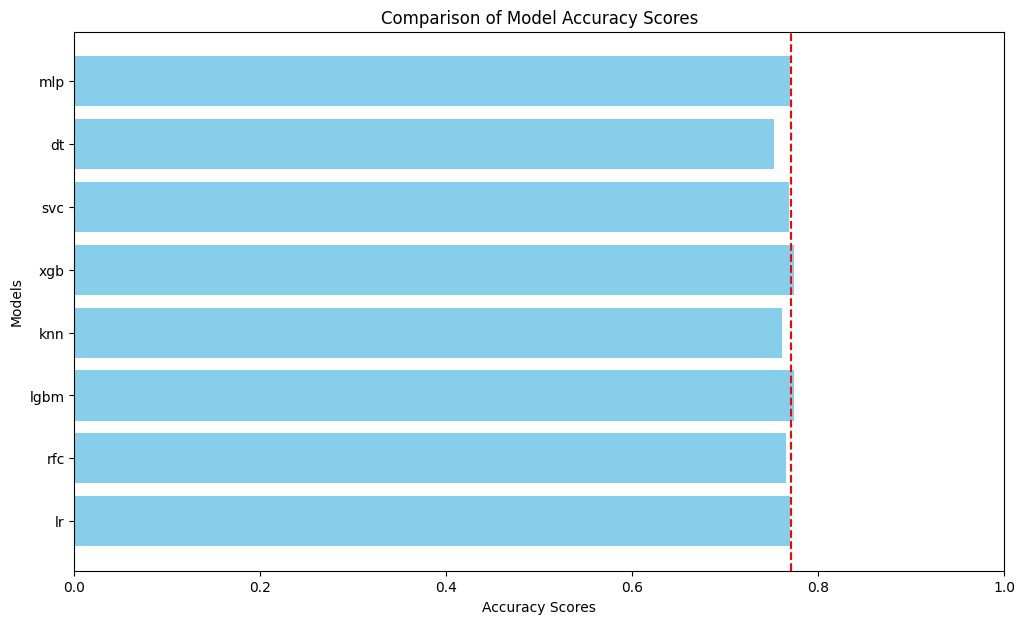

In [34]:
# Creating a horizontal bar plot
plt.figure(figsize=(12, 7))
plt.barh(model_names, model_scores, color='skyblue') 
plt.xlabel('Accuracy Scores') 
plt.ylabel('Models')
plt.title('Comparison of Model Accuracy Scores')
plt.xlim(0, 1) 

# Drawing a red line at 0.77 accuracy mark to indicate cutoff score
plt.axvline(x=0.77, color='red', linestyle='--') 
plt.show()

# Using the best model from above to predict data on testset

In [35]:
predictions = bestmodel.predict(testset)
# print(predictions)

# Checking Format of Sample Submission File

In [36]:
sample = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')
sample.head()

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4


# Creating a submission file

In [37]:
#creating a submission
submission = pd.DataFrame({'ID': range(1, len(predictions) + 1), 'Rating': predictions})
submission.to_csv('submission.csv', index=False)
#submission.head()